# **To Explore Unsupervised Machine Learning from Scratch**

### Importing Libraries


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot') 
import math


### Importing Iris data set

In [193]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [194]:
#Let's gather some information from data
print("Shape of Data")
print(str(list(df.shape)[0])+' rows and '+str(list(df.shape)[1])+' columns')

print('-'*90)
print('-'*90)
print()

print('Data Info')
print(df.info())

print('-'*90)
print('-'*90)
print()

print('Describe Data')
print(df.describe())

print('-'*90)
print('-'*90)
print()

print('Unique target Values')
print(df.Species.unique())

Shape of Data
150 rows and 6 columns
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

Describe Data
               Id  SepalLengthCm  SepalWidthCm  Pe

### Setting Target 


In [195]:
item = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2,
}
df['Target'] = [item[i] for i in df.Species]
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [196]:
df.Target.unique()

array([0, 1, 2])

### Some Visualization to better understand the data 

In [197]:
X = df.iloc[:,[1,2,3]].values
y = df.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/Users/meetbhanu/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/meetbhanu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/meetbhanu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/meetbhanu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

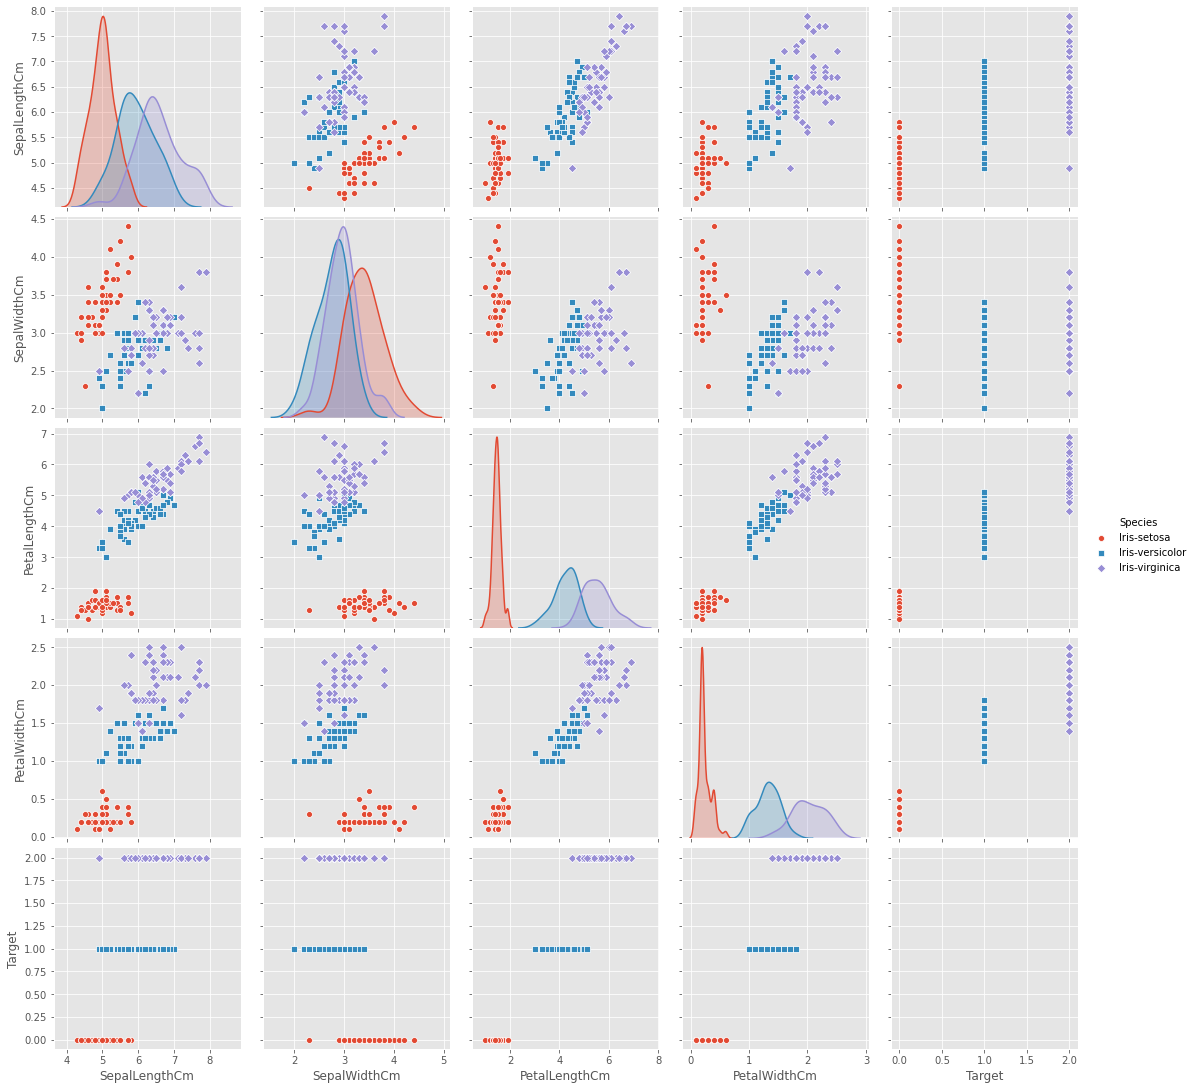

In [198]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()


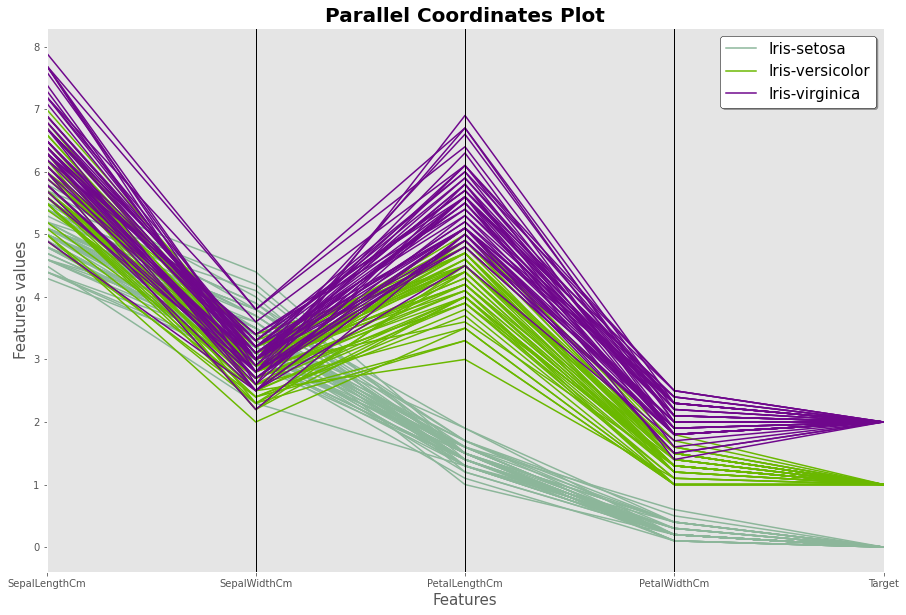

In [199]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### Train_Test_split

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [236]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 4
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,y_train)
pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, pred_y))

Accuracy of model at K=4 is 0.9


### Increasing accuracy by finding optimum K value 

Minimum error:- 0.03333333333333333 at K = 9


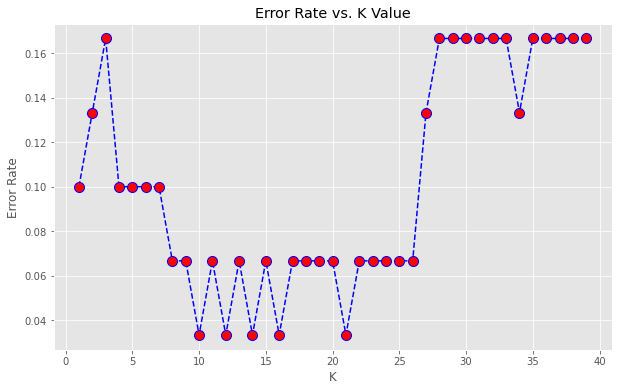

In [221]:

error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Max Accuracy:- 0.9666666666666667 at K = 9


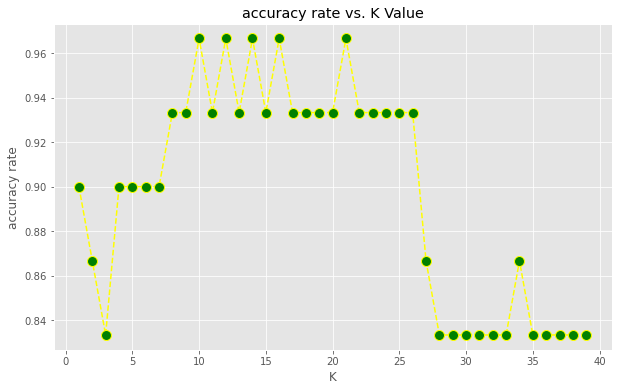

In [222]:
accuracy_rate = []
for j in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train,y_train)
    pred_j = knn.predict(X_test)
    accuracy_rate.append(metrics.accuracy_score(y_test, pred_j))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='yellow', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('accuracy rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy rate')
print("Max Accuracy:-",max(accuracy_rate),"at K =",accuracy_rate.index(max(accuracy_rate)))

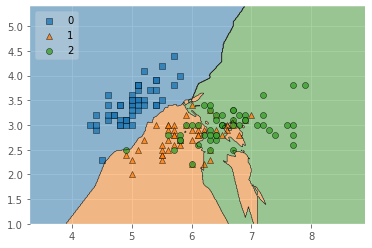

In [238]:
def knn_comparison(data, k):
    x = data.iloc[:,[1,2]].values
    y = data['Target'].astype(int).values
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
# Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
knn_comparison(df,9)

In [245]:
print("Accuracy:-",str(round(max(accuracy_rate)*100,2))+'%',"at K =",accuracy_rate.index(max(accuracy_rate)))

Accuracy:- 96.67% at K = 9
